In [45]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import ModelFlare as mf

In [46]:
# Read in new XMatch
df_xmatch436 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_436.h5','table')
df_xmatch437 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_437.h5','table')
df_xmatch488 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_488.h5','table')
df_xmatch489 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_489.h5','table')
df_xmatch538 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_538.h5','table')
df_xmatch539 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_539.h5','table')
df_xmatch540 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_540.h5','table')
df_xmatch541 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_541.h5','table')
df_xmatch591 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_591.h5','table')
df_xmatch592 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_592.h5','table')
df_xmatch638 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_638.h5','table')
df_xmatch639 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_639.h5','table')
df_xmatch685 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_685.h5','table')
df_xmatch686 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_686.h5','table')

In [47]:
xmatch = [df_xmatch436, df_xmatch437, df_xmatch488, df_xmatch489, df_xmatch538, df_xmatch539, df_xmatch540, 
          df_xmatch541, df_xmatch591, df_xmatch592, df_xmatch638, df_xmatch639, df_xmatch685, df_xmatch686]

In [50]:
#Change the id type to int
for i in xmatch:
    i['unique_matchids_exploded'] = i['unique_matchids_exploded'].astype(int)

In [51]:
#Make them one dataframe
df_xmatch = pd.DataFrame()

for i in xmatch:
    df_xmatch = df_xmatch.append(i)

In [52]:
#Change the id type to int
print(df_xmatch436.dtypes)
#df_xmatch['unique_matchids_exploded'] = df_xmatch['unique_matchids_exploded'].astype(int)

matchid                             int64
ra                                float64
dec                               float64
source_id                           int64
bp_rp                             float64
phot_g_mean_mag                   float64
phot_g_mean_flux_over_error       float64
parallax                          float64
parallax_error                    float64
axsdist                           float64
exploded_unique_matchids_index      int64
unique_matchids_exploded            int64
dtype: object


In [67]:
print(df_xmatch436)

                 matchid          ra       dec            source_id     bp_rp  \
0        436122210002755  280.733874 -1.647091  4259944895726304256  2.711182   
1        436122210001820  280.733946 -1.638059  4259944895725214976  2.762857   
2        436122210000475  280.734618 -1.643361  4259944895724327552  1.996664   
3        436122210013655  280.734624 -1.639344  4259944900021713792  2.410799   
4        436122210004712  280.735405 -1.649468  4259944831302182528  2.478540   
5        436122210004712  280.735405 -1.649468  4259944831302182528  2.478540   
6        436122210098665  280.735450 -1.640248  4259944900021706368  2.729658   
7        436122210098665  280.735450 -1.640248  4259944900021706368  2.729658   
8        436122210003353  280.736315 -1.646754  4259944900021671552  1.746391   
9        436122210003353  280.736315 -1.646754  4259944900021671552  1.746391   
10       436122210003353  280.736315 -1.646754  4259944900021671552  1.746391   
11       436123210017950  28

## Looking at Duplications in Individual Fields:

In [53]:
duplicates_xmatch436_uniqu = df_xmatch436.pivot_table(index =['unique_matchids_exploded'], aggfunc='size')
duplicates_xmatch436_match = df_xmatch436.pivot_table(index =['unique_matchids_exploded', 'matchid'], aggfunc='size')
duplicates_xmatch436_sourc = df_xmatch436.pivot_table(index =['unique_matchids_exploded', 'source_id'], aggfunc='size')
duplicates_xmatch436_all = df_xmatch436.pivot_table(index =['unique_matchids_exploded', 'matchid','source_id'], aggfunc='size')
duplicates_xmatch436_match_sourc = df_xmatch436.pivot_table(index =['matchid','source_id'], aggfunc='size')


(0, 2000)

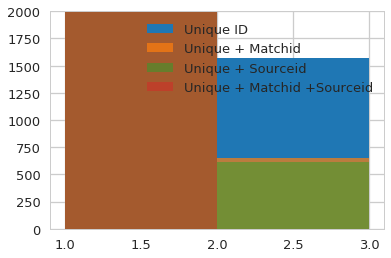

In [68]:
plt.hist(duplicates_xmatch436_uniqu.values, bins=[1,2,3], alpha=1, label='Unique ID')
plt.hist(duplicates_xmatch436_match.values, bins=[1,2,3], alpha=.7, label='Unique + Matchid')
plt.hist(duplicates_xmatch436_sourc.values, bins=[1,2,3], alpha=.5, label='Unique + Sourceid')
plt.hist(duplicates_xmatch436_all.values, bins=[1,2,3], alpha=.5, label='Unique + Matchid +Sourceid')
#plt.hist(duplicates_xmatch436_match_sourc.values, bins=[1,2,3], alpha=.5, label='Matchid +Sourceid')
plt.legend()
plt.ylim(0,2000)

In [60]:
print(len(duplicates_xmatch436_uniqu.loc[duplicates_xmatch436_uniqu.values >1]))
print(len(duplicates_xmatch436_match.loc[duplicates_xmatch436_match.values >1]))
print(len(duplicates_xmatch436_sourc.loc[duplicates_xmatch436_sourc.values >1]))
print(len(duplicates_xmatch436_all.loc[duplicates_xmatch436_all.values >1]))
print(len(duplicates_xmatch436_match_sourc.loc[duplicates_xmatch436_match_sourc.values >6]))

1574
650
611
0
1015


### Graph Explained:
This is looking at all the different combination of duplications. For field 436 there were 1574 times a unique_matchid was used more than once. There were 650 times a unique_matchid and matchid appeared together more than once. There were 611 times a unique_matchid and a Gaia_sourceid appeared together more than once. 

In [70]:
duplicates_xmatch436_match_sourc.loc[duplicates_xmatch436_match_sourc.values >25]

matchid          source_id          
488034210148993  4264334391000781184    57
dtype: int64

In [71]:
df_xmatch436.loc[df_xmatch436['matchid'] == 488034210148993]

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
4666252,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,0,488034210148993
4666253,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,1,488034210016386
4666254,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,2,437162210014210
4666255,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,3,488034210016901
4666256,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,4,488034210047495
4666257,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,5,488034210101896
4666258,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,6,436131210048525
4666259,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,7,437162210056462
4666260,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,8,488034210147855
4666261,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,9,437162210010384


In [72]:
no_dup_match_source = df_xmatch436.drop_duplicates(['matchid','source_id'])

In [73]:
duplicates_xmatch436 = no_dup_match_source.pivot_table(index =['matchid'], aggfunc='size')

In [78]:
duplicates_xmatch436.loc[duplicates_xmatch436.values >1]

matchid
436012200046832    2
436012200046843    2
436012200110537    2
436012200143688    2
436012200154787    2
436012210086760    2
436013200081401    2
436013200108735    2
436013200139053    2
436013200141824    2
436014200037368    2
436014200102793    2
436014210008738    2
436021200049515    2
436021200075062    2
436021200141899    2
436021200163758    2
436021200172774    2
436021210040355    2
436022200028977    2
436022200038458    2
436022200109821    2
436022200182282    2
436022200182283    2
436023200049329    2
436023200049357    2
436023200070199    2
436023200070222    2
436023200079601    2
436023200079606    2
                  ..
436154200182926    2
436154200189353    2
436154210045725    2
436161200021688    2
436161200050451    2
436162200117912    2
436162200119644    2
436163200065409    2
436163200089574    2
437042200078178    2
437042210075142    2
437082200117175    2
437083200071338    2
437122200011746    2
437122200080356    2
437122200091585    2
43712

In [81]:
no_dup_match_source.loc[no_dup_match_source['matchid'] == 436012200046832]

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
1621540,436012200046832,286.734972,-5.449995,4206301342633272192,1.825975,18.594885,183.247238,0.422928,0.395936,0.000001,0,436012200046832
4414670,436012200046832,286.734972,-5.449995,4206301342615486848,NaN,19.366268,181.209976,NaN,NaN,0.000003,0,436012200046832


### Current conclusion:
There are no duplicates of a combination of matchid, source_id, and unique_matchids_exploded. The exploded_unique_matchids_index shows duplicates of unique_matchids_exploded to a single matchid. There are some duplications the same matchid and unique_matchids_exploded going to different Gaia_sources. Not sure how this happened but easy to choose the one with the smaller axsdist.

### Trying to eliminate duplicates:

In [119]:
# Start witht the original dataframe
df_xmatch436

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
0,436122210002755,280.733874,-1.647091,4259944895726304256,2.711182,19.795309,152.442886,1.663635,0.501806,8.523954e-07,0,436122210002755
1,436122210001820,280.733946,-1.638059,4259944895725214976,2.762857,20.059027,88.366631,2.674194,0.929784,1.388707e-06,0,436122210001820
2,436122210000475,280.734618,-1.643361,4259944895724327552,1.996664,17.910002,524.161926,0.504240,0.138655,2.681570e-07,0,436122210000475
3,436122210013655,280.734624,-1.639344,4259944900021713792,2.410799,20.645643,87.630966,0.891499,1.013705,5.523244e-07,0,436122210013655
4,436122210004712,280.735405,-1.649468,4259944831302182528,2.478540,19.771769,145.326172,0.610965,0.544387,3.372558e-07,0,436122210004712
5,436122210004712,280.735405,-1.649468,4259944831302182528,2.478540,19.771769,145.326172,0.610965,0.544387,3.372558e-07,1,436123210013124
6,436122210098665,280.735450,-1.640248,4259944900021706368,2.729658,20.190050,110.393127,1.261092,0.687071,3.118348e-06,0,436122210083129
7,436122210098665,280.735450,-1.640248,4259944900021706368,2.729658,20.190050,110.393127,1.261092,0.687071,3.118348e-06,1,436122210098665
8,436122210003353,280.736315,-1.646754,4259944900021671552,1.746391,19.779970,157.726730,0.514437,0.541917,4.936904e-07,0,436123210020352
9,436122210003353,280.736315,-1.646754,4259944900021671552,1.746391,19.779970,157.726730,0.514437,0.541917,4.936904e-07,1,436122210003353


### Using exploded_unique_matchids_index
The exploded_unique_matchids_index indicates how many unique_matchids_exploded are matched to one matchid. This is shown in the example below. To eliminate these duplicates, only use exploded_unique_matchids_index = 0.

In [120]:
df_xmatch436.loc[df_xmatch436['matchid'] == 488034210148993]

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
4666252,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,0,488034210148993
4666253,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,1,488034210016386
4666254,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,2,437162210014210
4666255,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,3,488034210016901
4666256,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,4,488034210047495
4666257,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,5,488034210101896
4666258,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,6,436131210048525
4666259,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,7,437162210056462
4666260,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,8,488034210147855
4666261,488034210148993,288.019248,0.913557,4264334391000781184,0.477706,8.494645,2801.953125,1.169688,0.049237,0.000003,9,437162210010384


In [177]:
#only use exploded_unique_matchids_index ==0 to reduce duplicates 
df_xmatch436_0 = df_xmatch436.loc[df_xmatch436['exploded_unique_matchids_index']==0]

In [178]:
len(df_xmatch436_0) 

4574044

### Duplicates of Gaia sources for one matchid
Below shows an example of multiple gaia sources being matched to one ztf source. Using axsdist you can determine which gaia source is closest and choose that sources

In [101]:
df_xmatch436_0.loc[df_xmatch436_0['matchid'] == 436012200046832]

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
1621540,436012200046832,286.734972,-5.449995,4206301342633272192,1.825975,18.594885,183.247238,0.422928,0.395936,0.000001,0,436012200046832
4414670,436012200046832,286.734972,-5.449995,4206301342615486848,NaN,19.366268,181.209976,NaN,NaN,0.000003,0,436012200046832


In [141]:
duplicates_xmatch436_0_match_source = df_xmatch436_0.pivot_table(index =['matchid','source_id'], aggfunc='size')

In [142]:
duplicates_xmatch436_0_match_source.loc[duplicates_xmatch436_0_match_source.values >1]

Series([], dtype: int64)

The two cells above show that there are no duplicates of combinations of matchid and source_id. This means that every duplication of a matchid has a different gaia source. To pick which gaia source goes to the ztf source, pick the gaia source with the smallest axsdist.

In [121]:
#Find all duplicates of matchid
duplicates_xmatch436_0_match = df_xmatch436_0.pivot_table(index =['matchid'], aggfunc='size')

In [136]:
#only list matchids with more than one 
duplicates_xmatch436_0_match = duplicates_xmatch436_0_match.loc[duplicates_xmatch436_0_match.values >1]

In [182]:
def drop_gaia_dups(df_field):
    #field is the full field with exploded_unique_matchids_index ==0
    matchid_dup = df_field.pivot_table(index =['matchid'], aggfunc='size')
    matchid_dup = matchid_dup.loc[matchid_dup.values > 1]
    for i in matchid_dup.index:
        matchid_dup_rows = df_field.loc[df_field['matchid'] == i]
        df_field = df_field.drop(matchid_dup_rows['axsdist'].idxmax(), axis=0)
    return df_field

In [183]:
df_xmatch436_gaia_drop = drop_gaia_dups(df_xmatch436_0)

In [185]:
len(df_xmatch436_0) - len(df_xmatch436_gaia_drop)

558

In [186]:
duplicates_xmatch436_0_match = df_xmatch436_gaia_drop.pivot_table(index =['matchid'], aggfunc='size')
duplicates_xmatch436_0_uniqu = df_xmatch436_gaia_drop.pivot_table(index =['unique_matchids_exploded'], aggfunc='size')
duplicates_xmatch436_0_sourc = df_xmatch436_gaia_drop.pivot_table(index =['source_id'], aggfunc='size')

In [190]:
print(len(duplicates_xmatch436_0_match.loc[duplicates_xmatch436_0_match.values >1]))
print(len(duplicates_xmatch436_0_uniqu.loc[duplicates_xmatch436_0_uniqu.values >1]))
print(len(duplicates_xmatch436_0_sourc.loc[duplicates_xmatch436_0_sourc.values >2]))

0
145
2


In [191]:
duplicates_xmatch436_0_sourc.loc[duplicates_xmatch436_0_sourc.values >2]

source_id
4262016792258492544    3
4267276890263063808    3
dtype: int64

In [192]:
df_xmatch436_0.loc[df_xmatch436_0['source_id'] == 4262016792258492544]

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
2170348,436101210118778,285.832592,-1.684795,4262016792258492544,1.821724,19.482998,173.341461,0.112659,0.921287,0.000002,0,436101210120129
2170357,436104210101452,285.832596,-1.684613,4262016792258492544,1.821724,19.482998,173.341461,0.112659,0.921287,0.000004,0,436104210074079
2170362,436101210116341,285.832596,-1.684817,4262016792258492544,1.821724,19.482998,173.341461,0.112659,0.921287,0.000002,0,436104200135760
